In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
file_path = "/home/carlos/IA/FINAL/time-series_forecasting/September 2025 Complete Monthly Ridership (with adjustments and estimates)_251103 (1).xlsx"
data = pd.read_excel(file_path, sheet_name="UPT", header=0)
data.head(5)

,NTD ID,Legacy NTD ID,Agency,Mode/Type of Service Status,Reporter Type,UACE CD,UZA Name,Mode,TOS,3 Mode,...,12/2024,1/2025,2/2025,3/2025,4/2025,5/2025,6/2025,7/2025,8/2025,9/2025
0,1.0,0001,King County,Active,Full Reporter,80389.0,"Seattle--Tacoma, WA",DR,PT,Bus,...,87395.0,96298.0,83450.0,92739.0,96060.0,99005.0,93461.0,94065.0,92922.0,94417.0
1,1.0,0001,King County,Active,Full Reporter,80389.0,"Seattle--Tacoma, WA",DR,TX,Bus,...,7868.0,6315.0,6764.0,11638.0,13385.0,13713.0,12722.0,13221.0,13301.0,14626.0
2,1.0,0001,King County,Active,Full Reporter,80389.0,"Seattle--Tacoma, WA",FB,DO,Ferry,...,24240.0,26935.0,22362.0,30745.0,40686.0,46177.0,62267.0,83658.0,78141.0,53602.0
3,1.0,0001,King County,Inactive,Full Reporter,80389.0,"Seattle--Tacoma, WA",LR,DO,Rail,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0001,King County,Active,Full Reporter,80389.0,"Seattle--Tacoma, WA",MB,DO,Bus,...,5655460.0,6158381.0,5748640.0,6602619.0,6841438.0,6766326.0,6686060.0,6716230.0,6629625.0,6597525.0


### Eliminar las columnas hasta el 2023 


In [3]:
cols_to_drop = []

for col in data.columns:
    if "/" in col:
        parts = col.split("/")
        
        if len(parts) == 2:
            mes, año = parts
            
            if año.isdigit():
                year = int(año)
                
                if year > 2023:
                    cols_to_drop.append(col)

data = data.drop(columns=cols_to_drop)

print("Columnas eliminadas:", cols_to_drop)


Columnas eliminadas: ['1/2024', '2/2024', '3/2024', '4/2024', '5/2024', '6/2024', '7/2024', '8/2024', '9/2024', '10/2024', '11/2024', '12/2024', '1/2025', '2/2025', '3/2025', '4/2025', '5/2025', '6/2025', '7/2025', '8/2025', '9/2025']


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Columns: 274 entries, NTD ID to 12/2023
dtypes: float64(266), object(8)
memory usage: 4.9+ MB


In [5]:
data.isnull().sum()

NTD ID                           12
Legacy NTD ID                   102
Agency                           12
Mode/Type of Service Status      12
Reporter Type                    12
                               ... 
8/2023                         1021
9/2023                         1020
10/2023                        1021
11/2023                        1023
12/2023                        1021
Length: 274, dtype: int64

In [6]:
hr = data[data["Mode"] == "HR"].copy()
date_cols = [c for c in hr.columns
             if isinstance(c, str) and re.match(r"^\d{1,2}/\d{4}$", c)]
hr["num_missing"] = hr[date_cols].isna().sum(axis=1)
hr_sort = hr.sort_values(by="num_missing", ascending=False)
hr_sort[["Agency", "UZA Name", "num_missing"]].head(10)


,Agency,UZA Name,num_missing
1914,City and County of Honolulu,"Honolulu, HI",257
938,Alternativa de Transporte Integrado,"San Juan, PR",60
154,Massachusetts Bay Transportation Authority,"Boston, MA--NH",0
302,MTA New York City Transit,"New York--Jersey City--Newark, NY--NJ",0
350,Staten Island Rapid Transit Operating Authority,"New York--Jersey City--Newark, NY--NJ",0
504,Southeastern Pennsylvania Transportation Autho...,"Philadelphia, PA--NJ--DE--MD",0
318,Port Authority Transit Corporation,"Philadelphia, PA--NJ--DE--MD",0
349,Port Authority Trans-Hudson Corporation,"New York--Jersey City--Newark, NY--NJ",0
545,Maryland Transit Administration,"Baltimore, MD",0
537,Washington Metropolitan Area Transit Authority,"Washington--Arlington, DC--VA--MD",0


In [7]:
data = data[~data["UZA Name"].isin(["Honolulu, HI", "San Juan, PR"])]


In [8]:
new_rows = []

for idx, row in data.iterrows():
    mode_value = str(row["Mode"])
    ntd_value = str(row["NTD ID"])
    if mode_value == "HR" or ntd_value == "NTD ID":
        new_rows.append(row)

newData = pd.DataFrame(new_rows).reset_index(drop=True)

newData.head(5)


,NTD ID,Legacy NTD ID,Agency,Mode/Type of Service Status,Reporter Type,UACE CD,UZA Name,Mode,TOS,3 Mode,...,3/2023,4/2023,5/2023,6/2023,7/2023,8/2023,9/2023,10/2023,11/2023,12/2023
0,10003.0,1003,Massachusetts Bay Transportation Authority,Active,Full Reporter,9271.0,"Boston, MA--NH",HR,DO,Rail,...,7266019.0,6915755.0,7555508.0,7475582.0,7428692.0,7872552.0,7549343.0,7629155.0,6772827.0,6435183.0
1,20008.0,2008,MTA New York City Transit,Active,Full Reporter,63217.0,"New York--Jersey City--Newark, NY--NJ",HR,DO,Rail,...,176647689.0,161779844.0,183903625.0,170181767.0,152923078.0,168009408.0,181300044.0,181403724.0,176363812.0,173256395.0
2,20075.0,2075,Port Authority Transit Corporation,Active,Full Reporter,69076.0,"Philadelphia, PA--NJ--DE--MD",HR,DO,Rail,...,476433.0,430601.0,466231.0,463087.0,422754.0,462180.0,441297.0,500393.0,470901.0,451425.0
3,20098.0,2098,Port Authority Trans-Hudson Corporation,Active,Full Reporter,63217.0,"New York--Jersey City--Newark, NY--NJ",HR,DO,Rail,...,4552683.0,4383457.0,4967486.0,4661541.0,4534373.0,4837267.0,4805878.0,5236791.0,4738761.0,4561550.0
4,20099.0,2099,Staten Island Rapid Transit Operating Authority,Active,Full Reporter,63217.0,"New York--Jersey City--Newark, NY--NJ",HR,DO,Rail,...,484681.0,404962.0,476246.0,436881.0,366963.0,384334.0,440059.0,509497.0,473945.0,414707.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Columns: 269 entries, Agency to 12/2023
dtypes: float64(265), object(4)
memory usage: 29.6+ KB


In [9]:
df = newData.copy()

In [28]:
df = df.drop(columns=["3 Mode","TOS","UACE CD","Mode/Type of Service Status","Legacy NTD ID","Mode", "NTD ID", "UZA Name", "num_missing"], errors="ignore")

In [32]:
lines = df.astype(str).apply(lambda row: ",".join(row), axis=1).tolist()
header = df.columns.tolist()
agency_names = newData["Agency"].unique()
agency_names = {ag: i for i, ag in enumerate(agency_names)}


print(df.columns.tolist())
print(len(df))


['Agency', '1/2002', '2/2002', '3/2002', '4/2002', '5/2002', '6/2002', '7/2002', '8/2002', '9/2002', '10/2002', '11/2002', '12/2002', '1/2003', '2/2003', '3/2003', '4/2003', '5/2003', '6/2003', '7/2003', '8/2003', '9/2003', '10/2003', '11/2003', '12/2003', '1/2004', '2/2004', '3/2004', '4/2004', '5/2004', '6/2004', '7/2004', '8/2004', '9/2004', '10/2004', '11/2004', '12/2004', '1/2005', '2/2005', '3/2005', '4/2005', '5/2005', '6/2005', '7/2005', '8/2005', '9/2005', '10/2005', '11/2005', '12/2005', '1/2006', '2/2006', '3/2006', '4/2006', '5/2006', '6/2006', '7/2006', '8/2006', '9/2006', '10/2006', '11/2006', '12/2006', '1/2007', '2/2007', '3/2007', '4/2007', '5/2007', '6/2007', '7/2007', '8/2007', '9/2007', '10/2007', '11/2007', '12/2007', '1/2008', '2/2008', '3/2008', '4/2008', '5/2008', '6/2008', '7/2008', '8/2008', '9/2008', '10/2008', '11/2008', '12/2008', '1/2009', '2/2009', '3/2009', '4/2009', '5/2009', '6/2009', '7/2009', '8/2009', '9/2009', '10/2009', '11/2009', '12/2009', '1/20

In [33]:
agency_names

{'Massachusetts Bay Transportation Authority': 0,
 'MTA New York City Transit': 1,
 'Port Authority Transit Corporation': 2,
 'Port Authority Trans-Hudson Corporation': 3,
 'Staten Island Rapid Transit Operating Authority': 4,
 'Southeastern Pennsylvania Transportation Authority': 5,
 'Washington Metropolitan Area Transit Authority': 6,
 'Maryland Transit Administration': 7,
 'Metropolitan Atlanta Rapid Transit Authority': 8,
 'County of Miami-Dade ': 9,
 'The Greater Cleveland Regional Transit Authority': 10,
 'Chicago Transit Authority': 11,
 'San Francisco Bay Area Rapid Transit District': 12,
 'Los Angeles County Metropolitan Transportation Authority ': 13}

### Parsing data


In [37]:
date = df.columns[1:]
dates = pd.to_datetime(date,format="%m/%Y")
raw_data = df[date_cols].to_numpy(dtype=float)


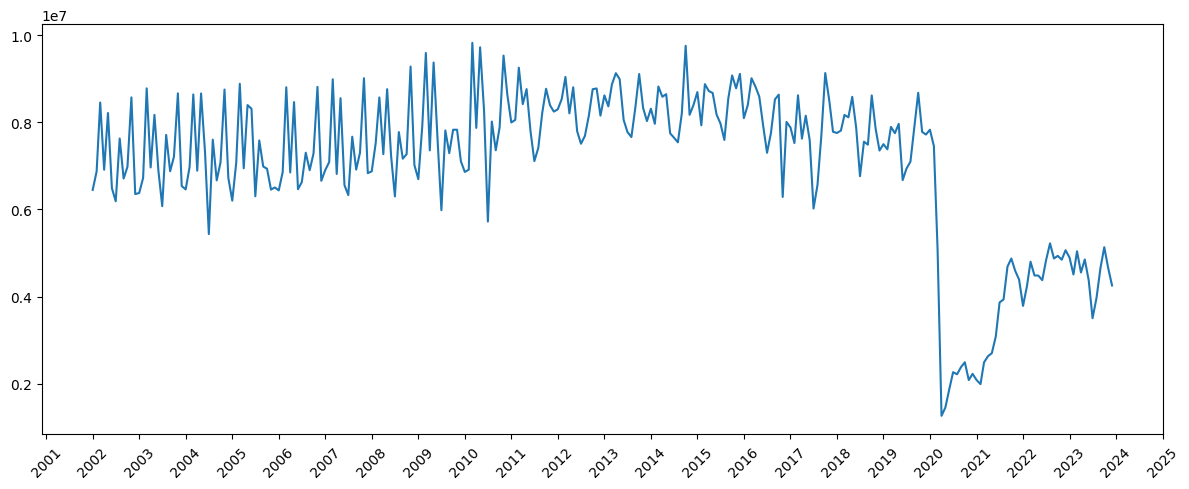

In [40]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(dates, raw_data[5])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Marcas cada 12 meses
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Plortting all agents

In [41]:
agency_names

{'Massachusetts Bay Transportation Authority': 0,
 'MTA New York City Transit': 1,
 'Port Authority Transit Corporation': 2,
 'Port Authority Trans-Hudson Corporation': 3,
 'Staten Island Rapid Transit Operating Authority': 4,
 'Southeastern Pennsylvania Transportation Authority': 5,
 'Washington Metropolitan Area Transit Authority': 6,
 'Maryland Transit Administration': 7,
 'Metropolitan Atlanta Rapid Transit Authority': 8,
 'County of Miami-Dade ': 9,
 'The Greater Cleveland Regional Transit Authority': 10,
 'Chicago Transit Authority': 11,
 'San Francisco Bay Area Rapid Transit District': 12,
 'Los Angeles County Metropolitan Transportation Authority ': 13}

### Fig. 2. Ridership at larger heavy rail agencies from January 2002 to December 2023.

Massachusetts Bay Transportation Authority
Port Authority Transit Corporation
Port Authority Trans-Hudson Corporation
Southeastern Pennsylvania Transportation Authority
Washington Metropolitan Area Transit Authority
Metropolitan Atlanta Rapid Transit Authority
Chicago Transit Authority
San Francisco Bay Area Rapid Transit District
Los Angeles County Metropolitan Transportation Authority 


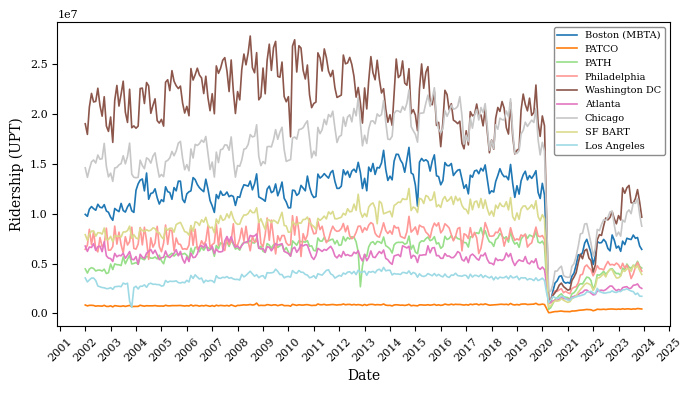

In [67]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Lista de agencias importantes que quieres graficar
graficar = [
    'Chicago Transit Authority',
    'Los Angeles County Metropolitan Transportation Authority ',
    "Massachusetts Bay Transportation Authority",
    'Metropolitan Atlanta Rapid Transit Authority',
    "Port Authority Trans-Hudson Corporation",
    "Port Authority Transit Corporation",
    "San Francisco Bay Area Rapid Transit District",
    'Southeastern Pennsylvania Transportation Authority',   # ojo: revisa typo
    'Washington Metropolitan Area Transit Authority' 
         

]

# Recolectamos todos los índices (filas) que vamos a graficar
idxs_a_graficar = []

for name, id_ in agency_names.items():
    if name in graficar:
        print(name)
        idxs = df.index[df["Agency"] == name].tolist()
        idxs_a_graficar.extend(idxs)

# Mapeo de nombres cortos para la leyenda
short_names = {
    'Chicago Transit Authority': 'Chicago',
    'Los Angeles County Metropolitan Transportation Authority ': 'Los Angeles',
    "Massachusetts Bay Transportation Authority": 'Boston (MBTA)',
    'Metropolitan Atlanta Rapid Transit Authority': 'Atlanta',
    "Port Authority Trans-Hudson Corporation": 'PATH',
    "Port Authority Transit Corporation": 'PATCO',
    "San Francisco Bay Area Rapid Transit District": 'SF BART',
    'Southeastern Pennsylvania Transportation Authority': 'Philadelphia',
    'Washington Metropolitan Area Transit Authority': 'Washington DC'
}

# Configuración de tamaños IEEE LaTeX estándar
plt.rcParams.update({
    'font.size': 9,           # Tamaño base
    'axes.labelsize': 10,     # Etiquetas de ejes
    'axes.titlesize': 10,     # Título
    'xtick.labelsize': 8,     # Etiquetas del eje X
    'ytick.labelsize': 8,     # Etiquetas del eje Y
    'legend.fontsize': 7,     # Leyenda
    'font.family': 'serif',   # Fuente tipo serif (similar a LaTeX)
})

# Creamos una sola figura
fig, ax = plt.subplots(figsize=(7, 4))  # Proporción IEEE típica

# Colores distintos para cada serie
n_series = len(idxs_a_graficar)
colors = plt.cm.tab20(np.linspace(0, 1, n_series))

for color, idx in zip(colors, idxs_a_graficar):
    agency_name = df.loc[idx, "Agency"]
    # Usar nombre corto si existe, sino usar el original
    label = short_names.get(agency_name, agency_name)
    
    ax.plot(
        dates,
        raw_data[idx],
        label=label,
        color=color,
        linewidth=1.2
    )

# Formato del eje X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

ax.set_xlabel("Date")
ax.set_ylabel("Ridership (UPT)")

# Leyenda en la esquina superior derecha, dentro del área del gráfico
ax.legend(loc='upper right', framealpha=0.9, edgecolor='gray')

plt.tight_layout()
plt.show()


Staten Island Rapid Transit Operating Authority
Maryland Transit Administration
County of Miami-Dade 
The Greater Cleveland Regional Transit Authority


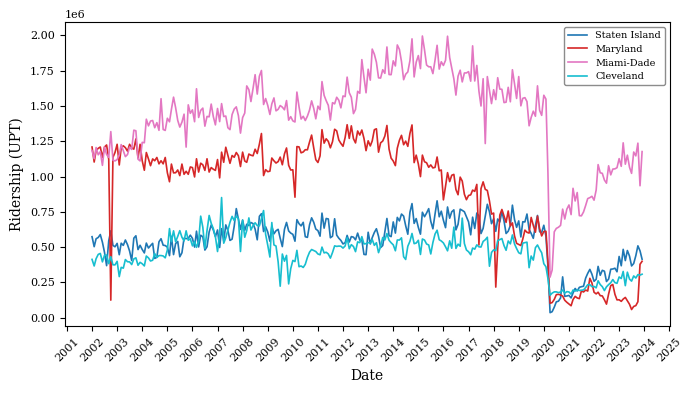

In [70]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Lista de agencias importantes que quieres graficar
graficar = [
    'County of Miami-Dade ',
    'Maryland Transit Administration',
    'Staten Island Rapid Transit Operating Authority',
    'The Greater Cleveland Regional Transit Authority'        # ojo: revisa typo
         

]

# Mapeo de nombres cortos para la leyenda
short_names = {
    'County of Miami-Dade ': 'Miami-Dade',
    'Maryland Transit Administration': 'Maryland',
    'Staten Island Rapid Transit Operating Authority': 'Staten Island',
    'The Greater Cleveland Regional Transit Authority': 'Cleveland'
}

# Configuración de tamaños IEEE LaTeX estándar
plt.rcParams.update({
    'font.size': 9,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 7,
    'font.family': 'serif',
})

# Recolectamos todos los índices (filas) que vamos a graficar
idxs_a_graficar = []

for name, id_ in agency_names.items():
    if name in graficar:
        print(name)
        idxs = df.index[df["Agency"] == name].tolist()
        idxs_a_graficar.extend(idxs)

# Creamos una sola figura
fig, ax = plt.subplots(figsize=(7, 4))

# Colores distintos para cada serie
n_series = len(idxs_a_graficar)
colors = plt.cm.tab10(np.linspace(0, 1, n_series))

for color, idx in zip(colors, idxs_a_graficar):
    agency_name = df.loc[idx, "Agency"]
    label = short_names.get(agency_name, agency_name)
    
    ax.plot(
        dates,
        raw_data[idx],
        label=label,
        color=color,
        linewidth=1.2
    )

# Formato del eje X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

ax.set_xlabel("Date")
ax.set_ylabel("Ridership (UPT)")

# Leyenda en la esquina superior derecha
ax.legend(loc='upper right', framealpha=0.9, edgecolor='gray')

plt.tight_layout()
plt.show()



Massachusetts Bay Transportation Authority
Port Authority Transit Corporation
Port Authority Trans-Hudson Corporation
Staten Island Rapid Transit Operating Authority
Southeastern Pennsylvania Transportation Authority
Washington Metropolitan Area Transit Authority
Maryland Transit Administration
Metropolitan Atlanta Rapid Transit Authority
County of Miami-Dade 
The Greater Cleveland Regional Transit Authority
Chicago Transit Authority
San Francisco Bay Area Rapid Transit District
Los Angeles County Metropolitan Transportation Authority 

Total agencias graficadas: 13


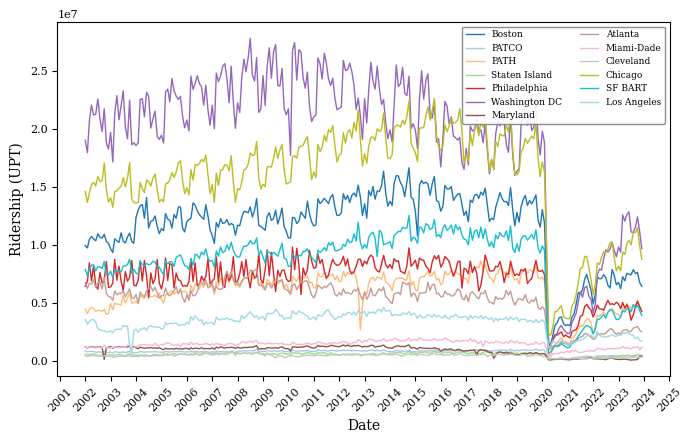

In [71]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Lista combinada de todas las agencias importantes (13 en total)
graficar_todas = [
    # Grupo 1: Agencias grandes
    'Chicago Transit Authority',
    'Los Angeles County Metropolitan Transportation Authority ',
    "Massachusetts Bay Transportation Authority",
    'Metropolitan Atlanta Rapid Transit Authority',
    "Port Authority Trans-Hudson Corporation",
    "Port Authority Transit Corporation",
    "San Francisco Bay Area Rapid Transit District",
    'Southeastern Pennsylvania Transportation Authority',
    'Washington Metropolitan Area Transit Authority',
    # Grupo 2: Agencias adicionales
    'County of Miami-Dade ',
    'Maryland Transit Administration',
    'Staten Island Rapid Transit Operating Authority',
    'The Greater Cleveland Regional Transit Authority'
]

# Mapeo de nombres cortos para la leyenda
short_names_all = {
    'Chicago Transit Authority': 'Chicago',
    'Los Angeles County Metropolitan Transportation Authority ': 'Los Angeles',
    "Massachusetts Bay Transportation Authority": 'Boston',
    'Metropolitan Atlanta Rapid Transit Authority': 'Atlanta',
    "Port Authority Trans-Hudson Corporation": 'PATH',
    "Port Authority Transit Corporation": 'PATCO',
    "San Francisco Bay Area Rapid Transit District": 'SF BART',
    'Southeastern Pennsylvania Transportation Authority': 'Philadelphia',
    'Washington Metropolitan Area Transit Authority': 'Washington DC',
    'County of Miami-Dade ': 'Miami-Dade',
    'Maryland Transit Administration': 'Maryland',
    'Staten Island Rapid Transit Operating Authority': 'Staten Island',
    'The Greater Cleveland Regional Transit Authority': 'Cleveland'
}

# Configuración de tamaños IEEE LaTeX estándar
plt.rcParams.update({
    'font.size': 9,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 6.5,  # Más pequeño para 13 agencias
    'font.family': 'serif',
})

# Recolectamos todos los índices de todas las agencias
idxs_todas = []
for name, id_ in agency_names.items():
    if name in graficar_todas:
        print(name)
        idxs = df.index[df["Agency"] == name].tolist()
        idxs_todas.extend(idxs)

print(f"\nTotal agencias graficadas: {len(idxs_todas)}")

# Creamos una sola figura
fig, ax = plt.subplots(figsize=(7, 4.5))

# Colores distintos para cada serie (13 agencias)
n_series = len(idxs_todas)
colors = plt.cm.tab20(np.linspace(0, 1, n_series))

for color, idx in zip(colors, idxs_todas):
    agency_name = df.loc[idx, "Agency"]
    label = short_names_all.get(agency_name, agency_name)
    
    ax.plot(
        dates,
        raw_data[idx],
        label=label,
        color=color,
        linewidth=1.0
    )

# Formato del eje X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

ax.set_xlabel("Date")
ax.set_ylabel("Ridership (UPT)")

# Leyenda en 2 columnas para mejor uso del espacio
ax.legend(loc='upper right', framealpha=0.9, edgecolor='gray', ncol=2)

plt.tight_layout()
plt.show()

### Fig. 3. Ridership at smaller heavy rail agencies from January 2002 to December 2023.

In [350]:
agency_names

{'Massachusetts Bay Transportation Authority': 0,
 'MTA New York City Transit': 1,
 'Port Authority Transit Corporation': 2,
 'Port Authority Trans-Hudson Corporation': 3,
 'Staten Island Rapid Transit Operating Authority': 4,
 'Southeastern Pennsylvania Transportation Authority': 5,
 'Washington Metropolitan Area Transit Authority': 6,
 'Maryland Transit Administration': 7,
 'Metropolitan Atlanta Rapid Transit Authority': 8,
 'County of Miami-Dade ': 9,
 'The Greater Cleveland Regional Transit Authority': 10,
 'Chicago Transit Authority': 11,
 'San Francisco Bay Area Rapid Transit District': 12,
 'Los Angeles County Metropolitan Transportation Authority ': 13}

Staten Island Rapid Transit Operating Authority
Maryland Transit Administration
County of Miami-Dade 
The Greater Cleveland Regional Transit Authority


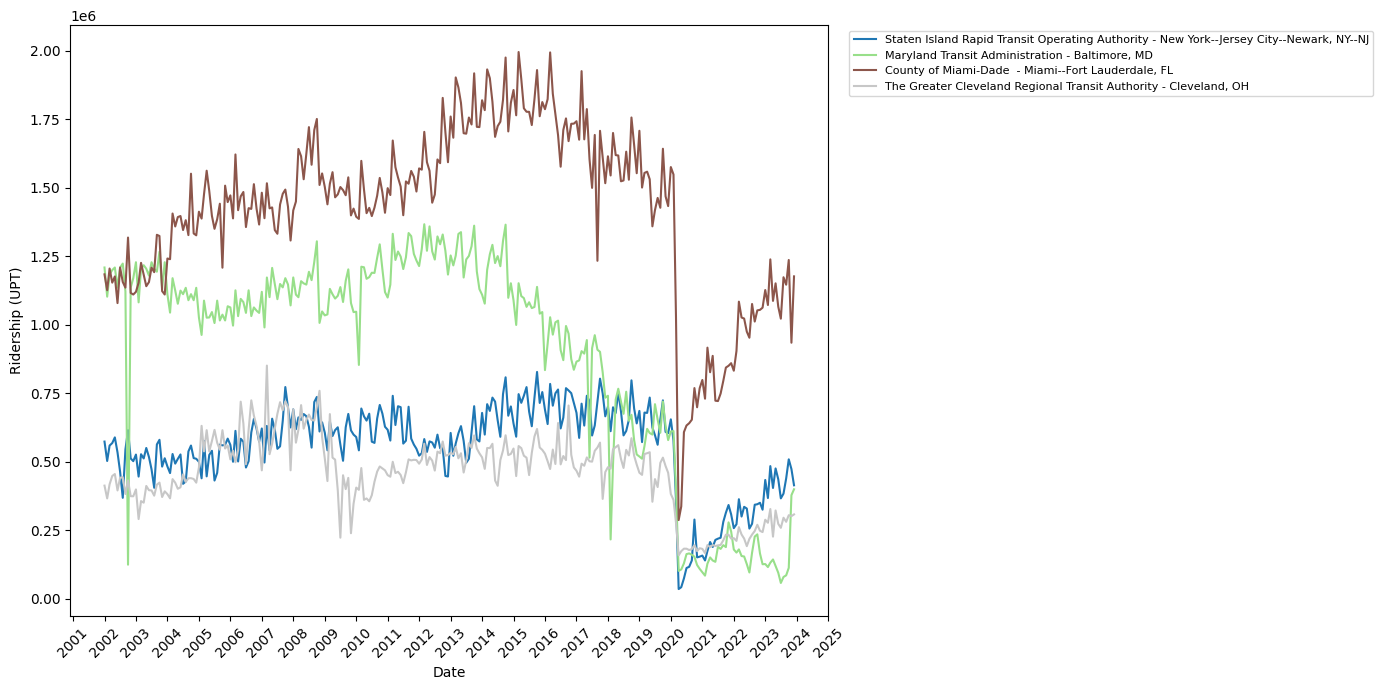

In [351]:

# Lista de agencias importantes que quieres graficar
graficar = [
    'County of Miami-Dade ',
    'Maryland Transit Administration',
    'Staten Island Rapid Transit Operating Authority',
    'The Greater Cleveland Regional Transit Authority'   
]

# Recolectamos todos los índices (filas) que vamos a graficar
idxs_a_graficar = []

for name, id_ in agency_names.items():
    if name in graficar:
        print(name)
        idxs = df.index[df["Agency"] == name].tolist()
        idxs_a_graficar.extend(idxs)

# Creamos una sola figura
plt.figure(figsize=(14, 7))

# Colores distintos para cada serie (una por fila en raw_data)
n_series = len(idxs_a_graficar)
colors = plt.cm.tab20(np.linspace(0, 1, 5))  # hasta 20 colores distintos

for color, idx in zip(colors, idxs_a_graficar):
    plt.plot(
        dates,
        raw_data[idx],
        label=f'{df.loc[idx, "Agency"]} - {df.loc[idx, "UZA Name"]}',
        color=color,
        linewidth=1.5
    )

# Formato del eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

plt.xlabel("Date")
plt.ylabel("Ridership (UPT)")


plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8)
plt.tight_layout()
plt.show()


## plotting the post and pre covid 

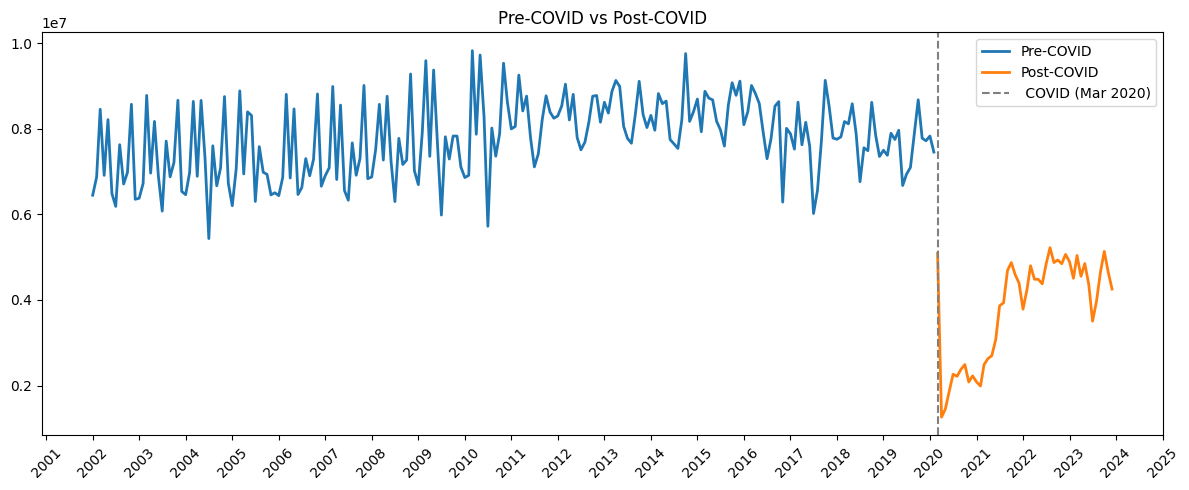

In [352]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
value = 5
# Fecha corte
cut = pd.Timestamp("2020-03-01")

# Máscaras
mask_pre  = dates < cut
mask_post = dates >= cut

plt.figure(figsize=(12,5))

# --- Pre-COVID ---
plt.plot(dates[mask_pre], raw_data[value][mask_pre], label="Pre-COVID", linewidth=2)

# --- Post-COVID ---
plt.plot(dates[mask_post], raw_data[value][mask_post], label="Post-COVID", linewidth=2)

# --- Formato del eje ---
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.axvline(cut, color='gray', linestyle='--', label=" COVID (Mar 2020)")

plt.legend()
plt.xticks(rotation=45)
plt.title("Pre-COVID vs Post-COVID")
plt.tight_layout()
plt.show()
